In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression#CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import sklearn as sk
import matplotlib.pyplot as plt
import os
import itertools
from sklearn import svm
from sklearn.model_selection import train_test_split

df = pd.read_csv(os.getcwd()+'/steel_data.csv')

sns.countplot(x="Class", data= df)



df_class1 = df[df.Class==1]
df_class2 = df[df.Class==2]
df_class2_upsampled = sk.utils.resample(df_class2,
                                        replace=True,
                                        n_samples=1268)
df = pd.concat([df_class1, df_class2_upsampled])
print(len(df))
sns.countplot(x="Class", data= df)



X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['Class'], test_size=0.49)


#clf.predict([X_test,y_test])

# w = clf.coef_[0]
# print(w)

# a = -w[0] / w[1]

# xx = np.linspace(0,12)
# yy = a * xx - clf.intercept_[0] / w[1]

# h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

# plt.scatter(X[:, 0], X[:, 1], c = y)
# plt.legend()
# plt.show()


2536


Accuracy_Score= 0.9887369267900241
Feature Importances [0.01122992 0.01511124 0.02196985 0.01694078 0.01831133 0.03245829
 0.01475263 0.03233018 0.01642739 0.01550198 0.03507049 0.01747121
 0.00425566 0.04449179 0.00999265 0.0057516  0.01696203 0.01722191
 0.00815544 0.01619509 0.         0.03397579 0.01758169 0.00766479
 0.01431406 0.0064944  0.00751747 0.09556696 0.08668684 0.092513
 0.01445238 0.02115025 0.23148091]


<BarContainer object of 27 artists>

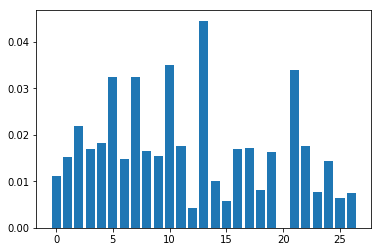

In [2]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)

#clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
#print(y2_predicted,y_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))
print("Feature Importances",clf.feature_importances_)
imp_features=clf.feature_importances_
imp_features=imp_features[:27]
imp_feature_names=X_train.columns[:27]

y_pos=np.arange(len(imp_feature_names))

plt.bar(x=y_pos,height=imp_features,width=0.8)
#plt.xticks(y_pos,imp_feature_names)

In [3]:

clf = LogisticRegression()
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))


Accuracy_Score= 0.6130329847144006


/home/shashanks/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train,y_train)
y2_predicted=clf.predict(X_test)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))


Accuracy_Score= 0.66532582461786


In [5]:
sk.metrics.confusion_matrix(y_test,y2_predicted)

array([[400, 228],
       [188, 427]])

Confusion matrix, without normalization
[[400 228]
 [188 427]]
Normalized confusion matrix
[[0.64 0.36]
 [0.31 0.69]]


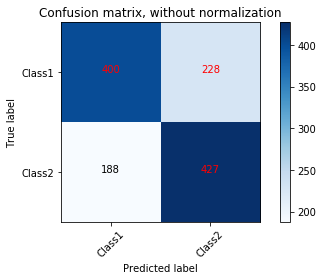

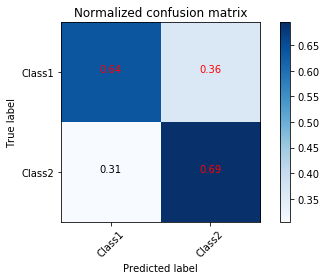

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="Red" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names=['Class1','Class2']
# Compute confusion matrix
cnf_matrix = sk.metrics.confusion_matrix(y_test, y2_predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [7]:
# PCA + Random forest
dr=PCA(n_components=20)
X_train_reduced=dr.fit_transform(X_train)
X_test_reduced=dr.fit_transform(X_test)

In [8]:

clf = RandomForestClassifier(n_estimators = 10)
#clf= KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_reduced,y_train)
y2_predicted=clf.predict(X_test_reduced)
print("Accuracy_Score=",sk.metrics.accuracy_score(y_test,y2_predicted))

Accuracy_Score= 0.6621078037007241
